# Pendulum

The state and control vectors $\textbf{x}$ and $\textbf{u}$ are defined as follows:

$$
\begin{equation*}
\textbf{x} = \begin{bmatrix}
    \theta & \dot{\theta}
    \end{bmatrix}
\end{equation*}
$$

$$
\begin{equation*}
\textbf{u} = \begin{bmatrix}
    \tau
    \end{bmatrix}
\end{equation*}
$$

The goal is to swing the pendulum upright:
$$
\begin{equation*}
\textbf{x}_{goal} = \begin{bmatrix}
    \pi & 0
    \end{bmatrix}
\end{equation*}
$$

**Note**: The force is constrained between $-2.5$ and $2.5$ Nm.

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pddp
import pddp.examples

In [5]:
import torch
import numpy as np

In [6]:
DT = 0.1  # Time step (s).
N = 40  # Horizon length.
RENDER = True  # Whether to render the environment or not.

# Disable uncertainty since we are dealing with known dynamics.
ENCODING = pddp.StateEncoding.IGNORE_UNCERTAINTY

In [7]:
cost = pddp.examples.pendulum.PendulumCost()
model = pddp.examples.pendulum.PendulumDynamicsModel(DT)
env = pddp.examples.pendulum.PendulumEnv(dt=DT, render=RENDER)

In [8]:
def plot(Z, U):
    t = np.arange(N + 1) * DT
    X = pddp.utils.encoding.decode_mean(Z, ENCODING).detach().numpy()
    U = model.constrain(U).detach().numpy()

    theta = np.unwrap(X[:, 0])  # Makes for smoother plots.
    theta_dot = X[:, 1]
    
    plt.figure()
    plt.plot(theta, theta_dot)
    plt.xlabel("Orientation (rad)")
    plt.ylabel("Angular velocity (rad/s)")
    plt.title("Orientation Phase Plot")

    plt.figure()
    plt.plot(t, theta)
    plt.xlabel("Time (s)")
    plt.ylabel("Orientation (rad)")
    plt.title("Orientation path")

    plt.figure()
    plt.plot(t, theta_dot)
    plt.xlabel("Time (s)")
    plt.ylabel("Angular velocity (rad / s)")
    plt.title("Angular velocity path")
    
    plt.figure()
    plt.plot(t[:-1], U)
    plt.xlabel("Time (s)")
    plt.ylabel("Torque (N m)")
    plt.title("Constrained action path")
    
    plt.figure()
    plt.plot(J_hist)
    plt.xlabel("Iteration")
    plt.ylabel("Total loss")
    plt.title("Loss path")

In [9]:
def on_iteration(iteration, state, Z, U, J_opt):
    J_opt = J_opt.detach().numpy()

    J_hist.append(J_opt)
    final_state = Z[-1].detach().numpy()
    final_state[0] = (final_state[0] + np.pi) % (2 * np.pi) - np.pi
    print("iteration", iteration + 1, state, J_opt, final_state)

In [10]:
controller = pddp.controllers.PDDPController(env, model, cost)

In [11]:
U = torch.randn(N, model.action_size)

In [12]:
J_hist = []
controller.eval()
Z, U, state = controller.fit(U, encoding=ENCODING, n_iterations=200,
                             on_iteration=on_iteration)

iteration 1 iLQRState.ACCEPTED 293.33643 [ 2.1277103 -0.5814373]
iteration 2 iLQRState.ACCEPTED 227.18907 [ 2.43498    -0.30652708]
iteration 3 iLQRState.ACCEPTED 212.42578 [ 2.4287775  -0.15413547]
iteration 4 iLQRState.ACCEPTED 195.74614 [ 2.490048   -0.07545096]
iteration 5 iLQRState.ACCEPTED 191.59628 [ 2.5365984  -0.05721152]
iteration 6 iLQRState.ACCEPTED 186.51765 [ 2.622795  -0.0266335]
iteration 7 iLQRState.ACCEPTED 185.40663 [ 2.6372235  -0.02295536]
iteration 8 iLQRState.ACCEPTED 181.56229 [2.8017461  0.05408812]
iteration 9 iLQRState.ACCEPTED 180.52072 [2.7875266  0.04144251]
iteration 10 iLQRState.ACCEPTED 179.33182 [2.7929895  0.02288759]
iteration 11 iLQRState.ACCEPTED 178.64452 [2.7894883  0.01736081]
iteration 12 iLQRState.ACCEPTED 177.66264 [2.8046517  0.00923973]
iteration 13 iLQRState.ACCEPTED 177.07086 [2.8048239  0.00719708]
iteration 14 iLQRState.ACCEPTED 176.18987 [2.8220997  0.00415152]
iteration 15 iLQRState.ACCEPTED 175.6675 [2.8230138  0.00341463]
iteration 

iteration 117 iLQRState.ACCEPTED 153.78728 [3.0538478e+00 1.0871887e-03]
iteration 118 iLQRState.ACCEPTED 153.66422 [3.0555735e+00 1.0775328e-03]
iteration 119 iLQRState.ACCEPTED 153.59962 [3.0554199e+00 1.0685325e-03]
iteration 120 iLQRState.ACCEPTED 153.51881 [3.0565872e+00 1.0322332e-03]
iteration 121 iLQRState.ACCEPTED 153.43112 [3.0559301e+00 1.0444522e-03]
iteration 122 iLQRState.ACCEPTED 153.37274 [3.0566351e+00 1.0327697e-03]
iteration 123 iLQRState.ACCEPTED 153.30612 [3.0566373e+00 1.0273457e-03]
iteration 124 iLQRState.ACCEPTED 153.24075 [3.0576401e+00 1.0206699e-03]
iteration 125 iLQRState.ACCEPTED 153.18452 [3.0578067e+00 1.0114908e-03]
iteration 126 iLQRState.ACCEPTED 153.11136 [3.0594425e+00 1.0024309e-03]
iteration 127 iLQRState.ACCEPTED 153.01067 [3.0592461e+00 1.0005832e-03]
iteration 128 iLQRState.ACCEPTED 152.91168 [3.0606668e+00 9.6982718e-04]
iteration 129 iLQRState.ACCEPTED 152.82155 [3.0604594e+00 9.6595287e-04]
iteration 130 iLQRState.ACCEPTED 152.75664 [3.06115

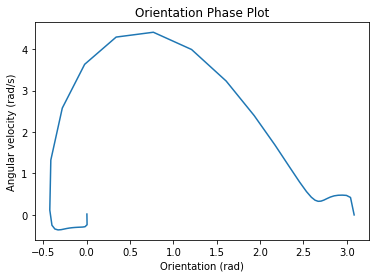

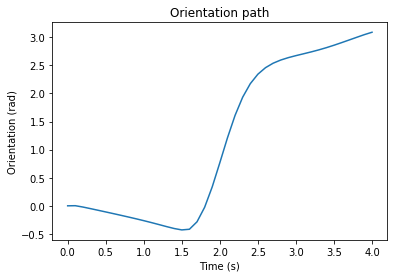

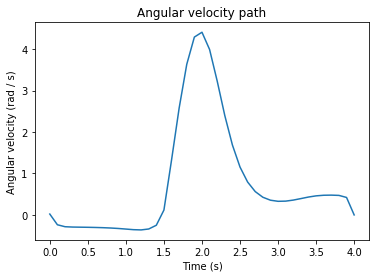

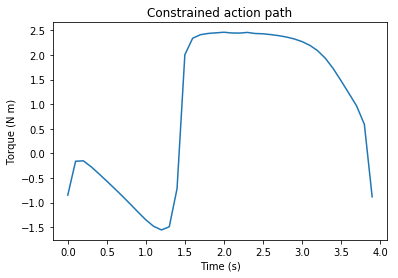

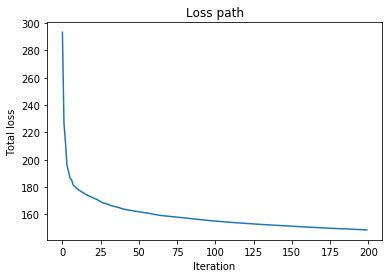

In [13]:
plot(Z, U)

In [14]:
if RENDER:
    # Wait for user interaction before visualizing. 
    _ = input("Press ENTER to continue")

Press ENTER to continue


In [15]:
env.reset()
for i in range(N):
    z = env.get_state().encode(ENCODING)
    u = controller(z, i, ENCODING)
    env.apply(u)

In [16]:
env.close()